**Staement:Higher square footage increases home sale price**

**H<sub>0</sub> = Home sale price will decrease of remain the same as square footage increases.**

**H<sub>A</sub>= Home sale price will increase as square footage increases.**


In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

# Initial Import of Data of 2019 data set

In [3]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
bldinfo_2019 = pd.read_csv('../../data/EXTR_ResBldg_2019.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str','PIN':'string'})
PINS=pd.read_csv('../../data/PINS.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})

**Now we need to filter our data on what we perceive to be actual sales.** 
**Exlusions:** Assumptions,Mortgage Assumption, Foreclosure,Trust,Executor-to admin guardian,Testamentary Trust,Estate,Settlement,Settlement, Property Settlement,Divorce Settlement
, Tenancy Partition, Community Prop Established, Partial Int - love,aff,gft,Easement, Correction (refiling),Trade,Quit Claim Deed - gift/full or part interest



In [4]:
actual_sales=sales_2019[(sales_2019["SaleReason"]==1)|(sales_2019["SaleReason"]==18)]
actual_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Now one more filter to only display residential sale

In [5]:
res_sales=actual_sales[(actual_sales["PropertyClass"]==7)|(actual_sales["PropertyClass"]==8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Lastly, we need to filter out the zeros in the Sales column. This is because of how it will heavily screw the data. 

In [6]:
finalsales=res_sales[res_sales["SalePrice"]!=0]
finalsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Next we will filter out our outlier based on Z scores. 

In [30]:
z_score=np.abs(stats.zscore(finalsales["SalePrice"]))
siftedsales=finalsales[z_score <3]
siftedsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Merge our residential building data with our now sifted sales data on the unique identifiers known as a PIN.

In [31]:
sales_and_building=siftedsales.merge(bldinfo_2019, how="inner", on="PIN")
sales_and_building

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0
3,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098,5810,124550,0098,1,1,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7,0,1140,0,0,0,0,0,1760,1030,620,6,410,100,,0,0,220,5,2,0,,3,0,1,1,0,1,0,0,1980,0,0,0,0,3,0
4,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320,377823,797320,2320,1,1,10246 5TH AVE SW 98146,10246,,,5TH,AVE,SW,98146,1.0,6,0,860,0,0,0,0,0,1240,380,380,6,0,0,,0,0,0,5,2,0,,3,1,1,1,1,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28587,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0
28588,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095,222599,405940,0095,1,1,11234 CORNELL AVE S 98178,11234,,,CORNELL,AVE,S,98178,1.0,6,0,1430,0,0,0,0,0,1430,0,0,0,0,0,,0,0,200,4,3,0,,4,1,0,2,1,0,0,0,1944,0,0,0,0,4,0
28589,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025,358894,381670,0025,1,1,18741 62ND AVE NE 98028,18741,,,62ND,AVE,NE,98028,1.0,8,0,1520,0,0,0,0,0,2270,1520,750,7,0,440,Y,0,0,450,5,1,0,,3,0,1,1,0,1,0,1,1958,0,0,0,0,3,0
28590,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BURKE,AVE,N,98133,2.0,7,0,840,0,1410,0,0,0,2250,0,0,0,0,0,,450,0,0,5,2,0,,3,1,0,2,1,0,0,0,194

In [ ]:
sales_and_building.corr()

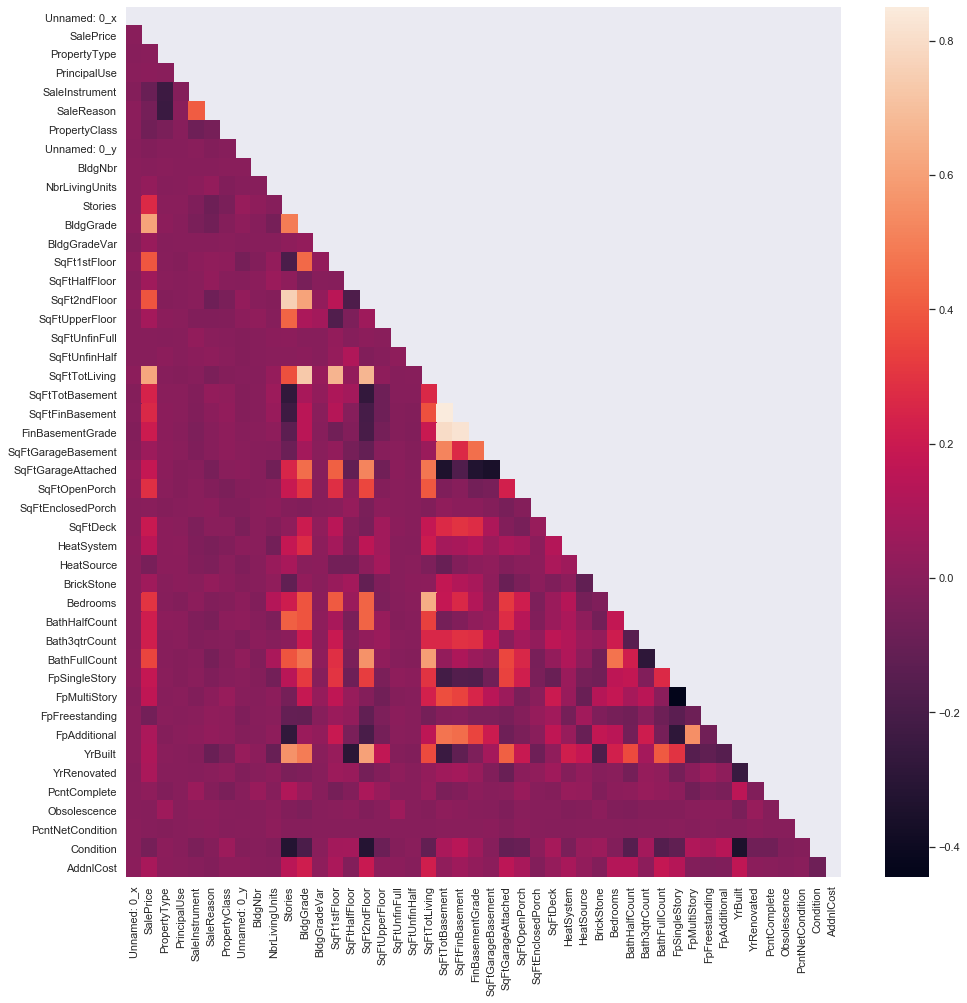

In [32]:
sns.set(rc={'figure.figsize':(16, 16)})
mask = np.triu(np.ones_like(sales_and_building.corr(), dtype=np.bool))
sns.heatmap(sales_and_building.corr(), mask=mask);
corrMatrix = sales_and_building.corr()

In [44]:
fsm_df = pd.DataFrame([sales_and_building.SalePrice,sales_and_building.SqFtTotLiving, sales_and_building.SqFt1stFloor,sales_and_building.SqFt2ndFloor])
fsm_df= fsm_df.transpose()
fsm_df

,SalePrice,SqFtTotLiving,SqFt1stFloor,SqFt2ndFloor
0,560000,1930,1930,0
1,435000,1975,1057,918
2,450000,1080,1080,0
3,193000,1760,1140,0
4,540000,1240,860,0
...,...,...,...,...
28587,1205000,2880,2880,0
28588,442000,1430,1430,0
28589,680000,2270,1520,0
28590,745000,2250,840,1410


In [45]:
fsm_df.corr()["SalePrice"]

SalePrice        1.000000
SqFtTotLiving    0.620623
SqFt1stFloor     0.393414
SqFt2ndFloor     0.389528
Name: SalePrice, dtype: float64

In [46]:
fsm_df=fsm_df.dropna()

In [47]:
fsm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28592 entries, 0 to 28591
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      28592 non-null  int64
 1   SqFtTotLiving  28592 non-null  int64
 2   SqFt1stFloor   28592 non-null  int64
 3   SqFt2ndFloor   28592 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [48]:
fsm=cm_functions.get_fsm(fsm_df)

Rsquared: 0.38923646743681894
BETA values:
Intercept        76608.662921
SqFtTotLiving    392.206676  
SqFt1stFloor    -85.922255   
SqFt2ndFloor    -69.403976   
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6073.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:30:18   Log-Likelihood:            -4.0933e+05
No. Observations:               28592   AIC:                         8.187e+05
Df Residuals:                   28588   BIC:                         8.187e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                   

In [49]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6073.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:30:19   Log-Likelihood:            -4.0933e+05
No. Observations:               28592   AIC:                         8.187e+05
Df Residuals:                   28588   BIC:                         8.187e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.661e+04   6726.657     11.389      0.000    6.34e+04    8.98e+04
SqFtTotLiving   392.2067      5.173     75.819      0.000     382.068     402.346
SqFt1stFloor    -85.9223      7.528    -11.414      0.000    -100.677     -71.167
SqFt2ndFloor    -69.4040      5.496    -12.629      0.000     -80.175     -58.633
==============================================================================
Omnibus:                    13994.887   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161167.628
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                      13.865   Cond. No.                     7.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.    Thus returning a low p-value means that the current model violates the homoscedasticity assumption


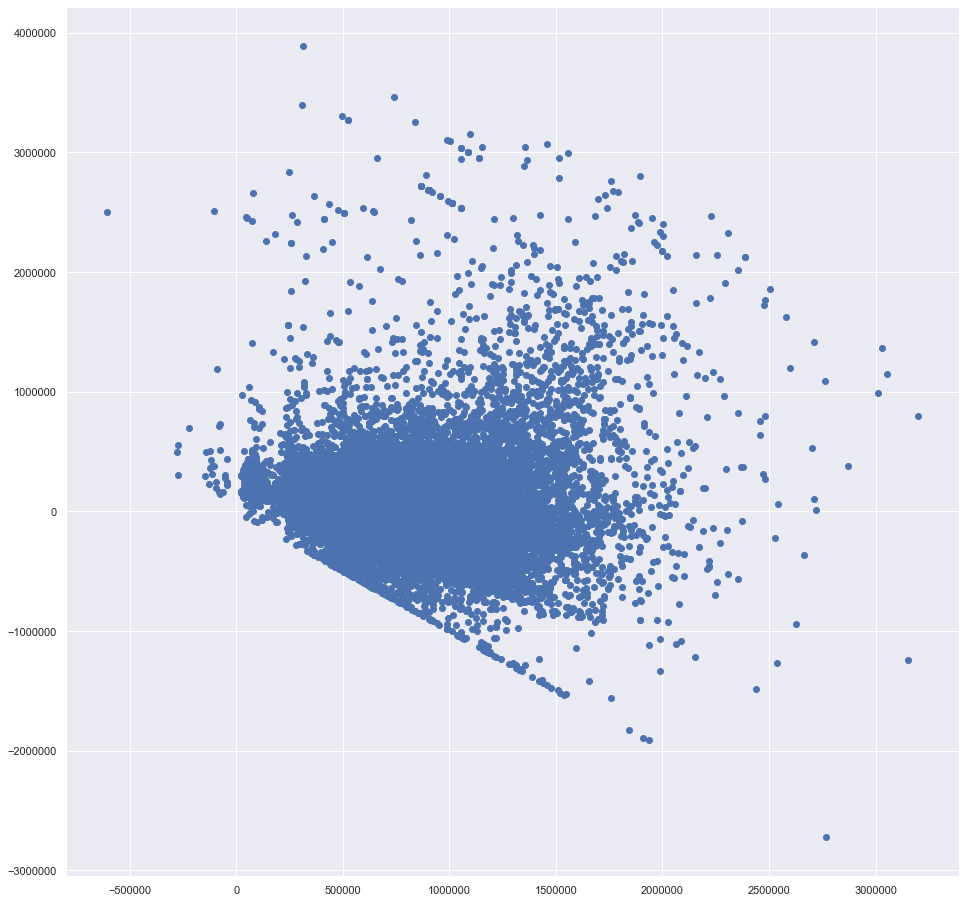

In [25]:
cm_functions.lr_homoscad(fsm, fsm_df)

In [16]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 1.037669600975116
Rainbow p-value: 0.01353734605779704


(1.037669600975116, 0.01353734605779704)

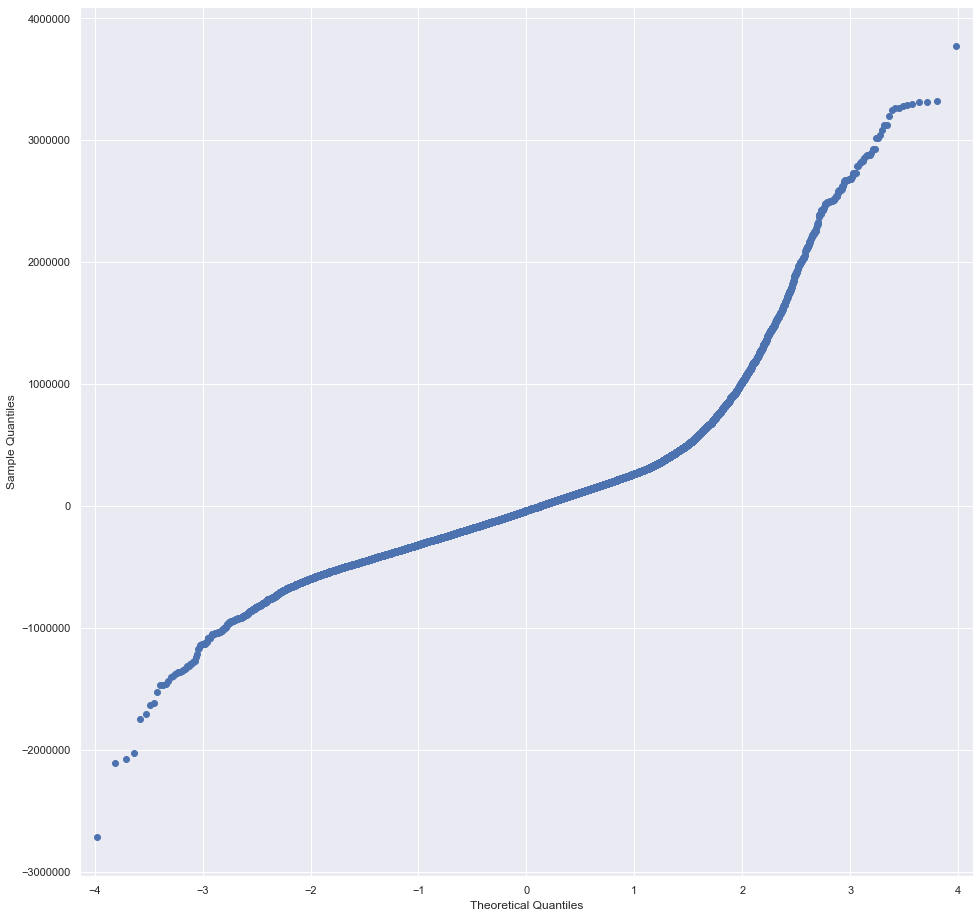

In [17]:
cm_functions.lr_normality(fsm)

In [26]:
cm_functions.lr_independence(fsm_df)

        VIF        feature
0  9.943057  SqFtTotLiving
1  9.943057  BldgGrade    


VIF needs to be smaller than 5.


In [18]:
#from scipy.stats import iqr
#iqr(sales_2019['SalePrice'])

In [19]:
#sales_2019.SalePribce.quantile([0.25,0.50,0.75])
